In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
class NB:
  # apple_m = np.ones(3)
  # leaf_m = np.ones(3)
  # stick_m =np.ones(3)
  # back_m =np.ones(3)

  # apple_seg = np.ones(3)
  # leaf_seg = np.ones(3)
  # stick_seg = np.ones(3)
  # back_seg = np.ones(3)
  # apple_m = leaf_m = stick_m =back_m =apple_seg = leaf_seg = stick_seg = back_seg = 0
  # applePrior = leafPrior = stickPrior = backPrior = 0
  # apple_m = leaf_m  =back_m =apple_seg = leaf_seg = back_seg = applePrior = leafPrior = backPrior = 0

  def __init__(self,image ,imageTrain):
    self.__train__(image,imageTrain)

  def show_pic(self,img,name):
      fig = plt.figure(figsize=(12,10))
      ax = fig.add_subplot(111)
      ax.imshow(img)
      plt.title(name)

  def load_image(self,imagePath):
    # return cv2.imread(imagePath)
    return cv2.cvtColor(cv2.imread(imagePath) , cv2.COLOR_BGR2RGB)

  def __train__(self,image , imageTrain):
    image = self.load_image(image)
    # self.show_pic(image,'apple')

    imageTrain = self.load_image(imageTrain)
    self.show_pic(imageTrain,'training apple')

    imgSize = image.shape[1] * image.shape[0] 
    # appleCount = backgroundCount =  leafCount =  stickCount = 0
    appleCount = backgroundCount =  leafCount = 1

    apple_inten = np.ones(3)
    leaf_inten = np.ones(3)
    back_inten = np.ones(3)
    # stick_inten = np.zeros(3)
    threashold = 230
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):

          if min(imageTrain[i][j]) >= threashold:
              backgroundCount+=1
              back_inten = np.add(back_inten,image[i][j])

          elif(imageTrain[i][j][1] >= threashold):
              leafCount+=1
              leaf_inten = np.add(leaf_inten,image[i][j])

          elif(imageTrain[i][j][0] >= threashold):
              appleCount+=1
              apple_inten = np.add(apple_inten,image[i][j])
              
          # elif(imageTrain[i][j][2] == 255):
          #     stickCount+=1
          #     stick_inten = np.add(stick_inten,image[i][j]);
              
    self.apple_m = np.divide(apple_inten, appleCount)
    self.leaf_m = np.divide(leaf_inten, leafCount) 
    self.back_m = np.divide(back_inten, backgroundCount) 
    # self.stick_m = np.divide(stick_inten, stickCount) 

    self.apple_seg = np.ones(3)
    self.leaf_seg = np.ones(3)
    self.back_seg = np.ones(3)
    # self.stick_seg = np.zeros(3)

    for i in range(image.shape[0]):
      for j in range(image.shape[1]):

          if min(imageTrain[i][j] >= threashold):
              self.back_seg = np.add(self.back_seg,(image[i][j]-self.back_m)**2)
          
          elif(imageTrain[i][j][0] >= threashold):
              self.apple_seg = np.add(self.apple_seg , (image[i][j]-self.apple_m)**2)

          elif(imageTrain[i][j][1] >= threashold):
              self.leaf_seg = np.add(self.leaf_seg ,(image[i][j]-self.leaf_m)**2)
              
          # elif(imageTrain[i][j][2] == 255):
              # self.stick_seg = np.add(self.stick_seg, (image[i][j]-self.stick_m)**2)

    self.back_seg /= backgroundCount
    self.apple_seg /= appleCount
    self.leaf_seg /= leafCount
    # self.stick_seg /= stickCount

    self.applePrior = appleCount/ imgSize
    self.leafPrior = leafCount/ imgSize
    self.backPrior = backgroundCount/imgSize
    # self.stickPrior = stickCount /imgSize
    
  def P(self,h , m , seg):
    return np.multiply.reduce(np.divide(np.exp(np.divide(np.square(h-m),-2*seg)),np.sqrt(2*3.14*seg)))

  def test(self,image):
    image = self.load_image(image)
    self.show_pic(image,'apple')

    appleImg = np.zeros(image.shape, dtype = np.uint8)
    leafImg = np.zeros(image.shape, dtype = np.uint8)
    backgroundImg = np.zeros(image.shape, dtype = np.uint8)
    
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):

          papple = self.applePrior * self.P(image[i][j] , self.apple_m , self.apple_seg)
          pleaf = self.leafPrior * self.P(image[i][j] , self.leaf_m , self.leaf_seg)
          pback = self.backPrior * self.P(image[i][j] , self.back_m , self.back_seg)
          # pstick = self.stickPrior * self.P(image[i][j] , self.stick_m , self.stick_seg)
    
          # Pixel Classification
          # if pstick > max(papple , pback, pleaf):
          #     segmented[i][j][0] = 0
          #     segmented[i][j][1] = 0
          #     segmented[i][j][2] = 255
          if pleaf > max(papple ,pback):
              #leafImg[i][j][1] = 255
              leafImg[i][j] = image[i][j]
          elif papple > max(pleaf ,pback):
              appleImg[i][j] = image[i][j]
          else:
              backgroundImg[i][j] = image[i][j]

    self.show_pic(leafImg,'leaf')
    self.show_pic(appleImg,'apple')
    self.show_pic(backgroundImg,'background')

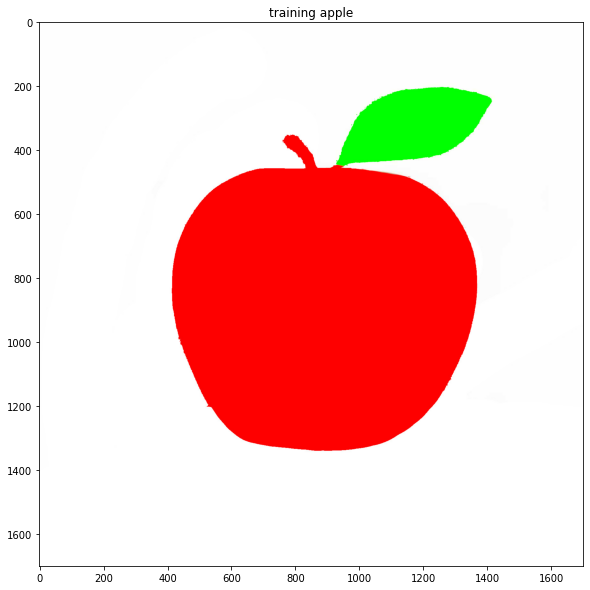

In [3]:
# train the model
# img = 'compressed/a.png'
# imgTrain = 'compressed/at.png'
# img = 'compressed/a1.jpeg'
# imgTrain = 'compressed/a1t.png'
img = os.path.join('normal size','a2.jpg')
imgTrain = os.path.join('normal size','a2t.jpg')
nb = NB(img,imgTrain)

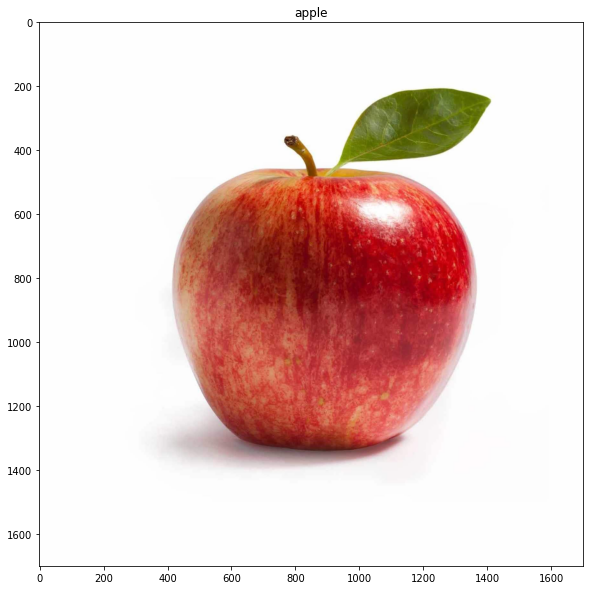

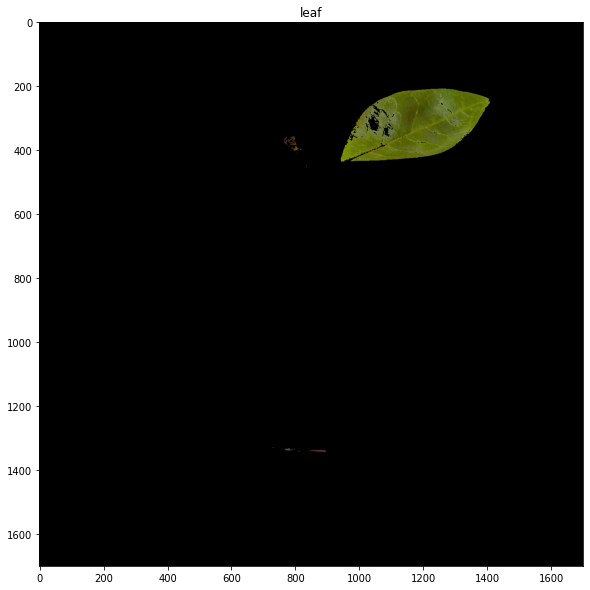

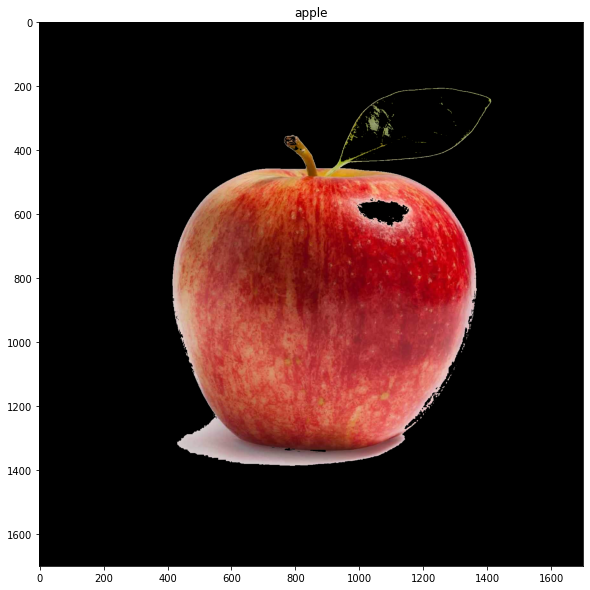

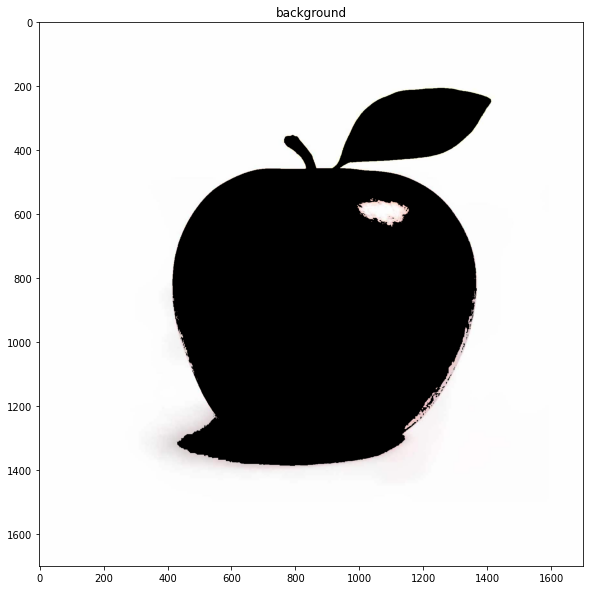

In [4]:
nb.test(img)

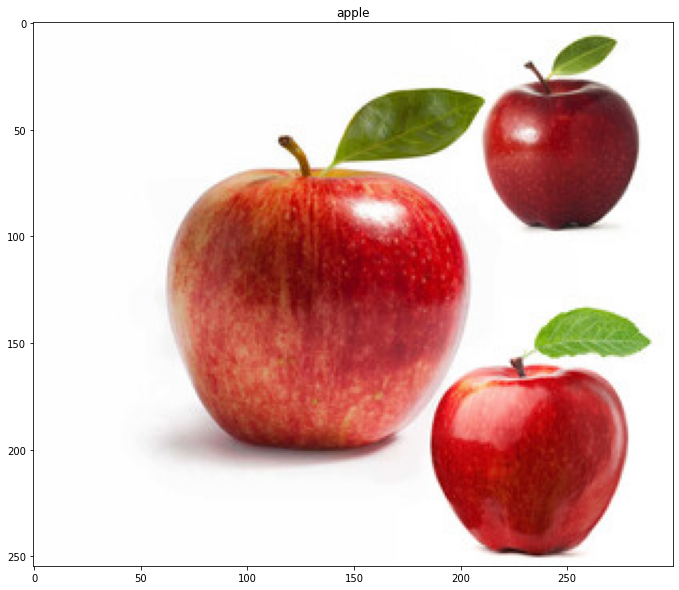

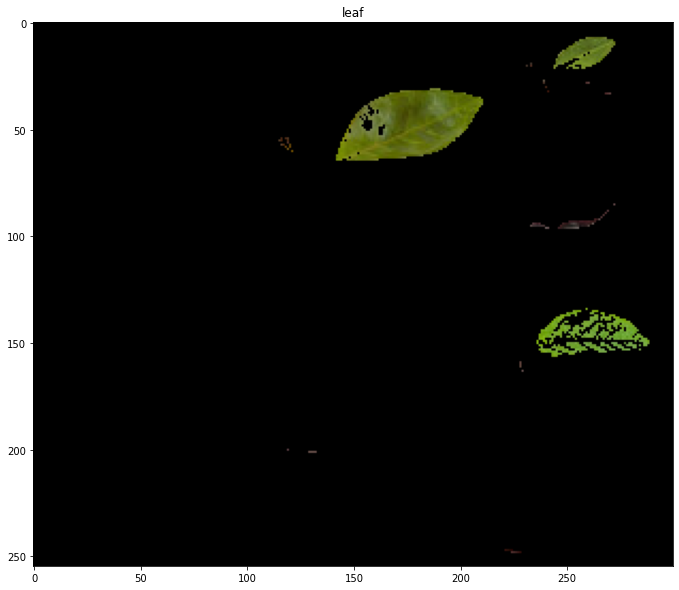

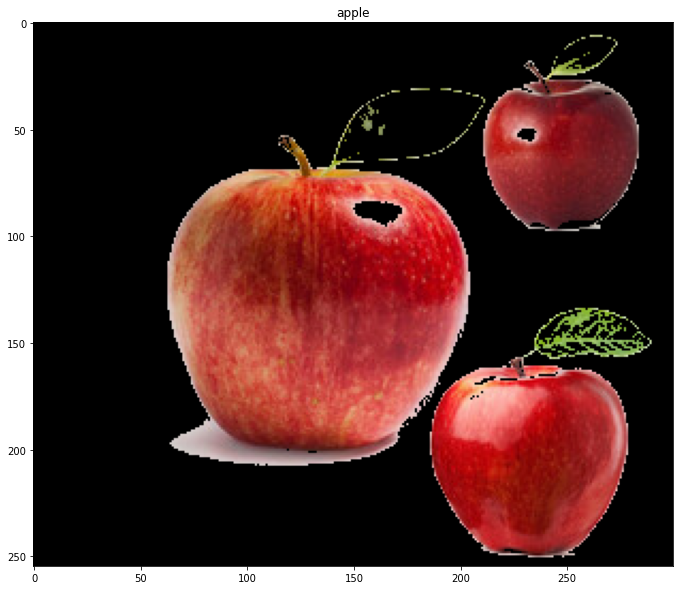

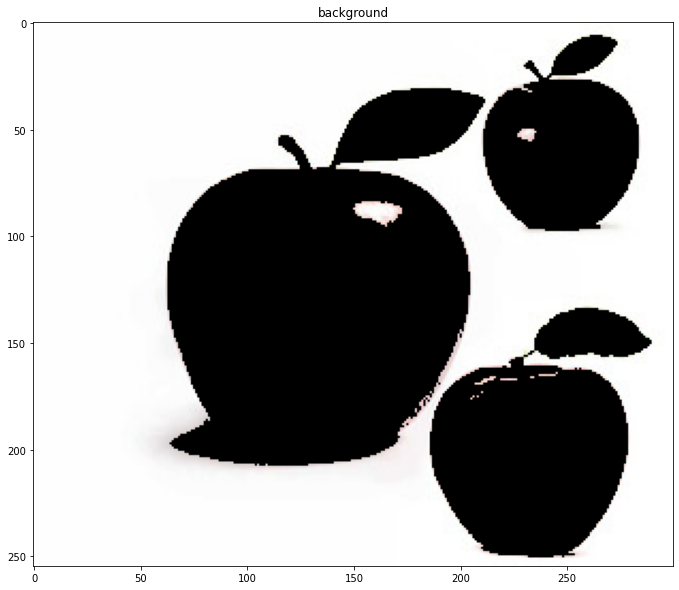

In [5]:
# now we will classify every single pixel and draw it on a new image
# nb.test('compressed/a2.jpg')
# nb.test('compressed/a3.jpeg')
nb.test(os.path.join('compressed','aa.jpg'))
# nb.test('compressed/a.png')
# nb.test('a1.jpeg')
# nb.test('a2.jpg')
# nb.test('a3.jpeg')